### 4 Convolutional layers (17 Points)


In this exercise, we want to create a similar neural network to LeNet by Yann LeCun. LeNet was designed for handwritten and machine-printed character recognition. It relies on convolutional layers that transform the input image by convolution with multiple learnable layers. LeNet contains convolutional layers paired with sub-sampling layers, as displayed in Figure 1. The subsampling is done via max pooling, which reduces an area of the image to one pixel with the maximum value of the area. Both functions are already available in PyTorch:
4.1
from torch.nn.functional import conv2d , max_pool2d
convolutional_layer = rectify(conv2d(previous_layer , weightvector)) # reduces (2,2) window to 1 pixel
subsampling_layer = max_pool_2d(convolutional_layer , out_layer = dropout(subsample_layer , p_drop_input)
Create a Convolutional network
(2, 2))
Now we can design our own convolutional neural network that classifies the handwritten numbers from MNIST.
Implementation task:
1. Make sure that the input image has the correct shape: trainX = trainX.reshape(-1, 1, 28, 28)#training data
testX = testX.reshape(-1, 1, 28, 28) #test data
2.Replace the first hidden layer h with 3 convolutional layers (including subsampling and dro- pout)
3. Connect the convolutional layers to the vectorized layer h2 by flattening the input with the torch.reshape.
4. The shape of the weight parameter for conv2d determines the number of filters f, the number of input images picin, and the kernel size k = (kx,ky). You can initialize the weights with
init_weights((f, pic_in, k_x, k_y))
Make  a neural network with :
$\begin{array}{|c|c|c|c|}
\hline
\text{convolutional layer} & \text{first} & \text{second} & \text{third} \\
\hline
f & 32 & 64 & 128 \\
\hline
\text{pic\{in\}} & 1 & 32 & 64 \\
\hline
k_x & 5 & 5 & 2 \\
\hline
k_y & 5 & 5 & 2 \\
\hline
\end{array}$

4.2 Application of Convolutional network 
- Task:
- Draw a sketch of the network (like Figure 1) and note the sizes of the lter images (This will help you to determine how many pixels there are in the last convolution layer).
- Train the model. Then, plot:
- one image from the test set
- its convolution with 3 filters of the first convolutional layer
- the corresponding filter weights (these should be 5 by 5 images).

In [ ]:
from IPython import display
display.Image("Assignment03/submission/lenet_arch.jpeg")

Epoch: 1, Batch: 1000, Loss: 0.420
Epoch: 1, Batch: 2000, Loss: 0.174
Epoch: 1, Batch: 3000, Loss: 0.128
Epoch: 1, Batch: 4000, Loss: 0.121
Epoch: 1, Batch: 5000, Loss: 0.133
Epoch: 1, Batch: 6000, Loss: 0.112
Epoch: 1, Batch: 7000, Loss: 0.093
Epoch: 1, Batch: 8000, Loss: 0.108
Epoch: 1, Batch: 9000, Loss: 0.097
Epoch: 1, Batch: 10000, Loss: 0.087
Epoch: 1, Batch: 11000, Loss: 0.094
Epoch: 1, Batch: 12000, Loss: 0.079
Epoch: 1, Batch: 13000, Loss: 0.091
Epoch: 1, Batch: 14000, Loss: 0.088
Epoch: 1, Batch: 15000, Loss: 0.092
Epoch: 2, Batch: 1000, Loss: 0.072
Epoch: 2, Batch: 2000, Loss: 0.079
Epoch: 2, Batch: 3000, Loss: 0.062
Epoch: 2, Batch: 4000, Loss: 0.079
Epoch: 2, Batch: 5000, Loss: 0.072
Epoch: 2, Batch: 6000, Loss: 0.080
Epoch: 2, Batch: 7000, Loss: 0.078
Epoch: 2, Batch: 8000, Loss: 0.066
Epoch: 2, Batch: 9000, Loss: 0.058
Epoch: 2, Batch: 10000, Loss: 0.084
Epoch: 2, Batch: 11000, Loss: 0.059
Epoch: 2, Batch: 12000, Loss: 0.066
Epoch: 2, Batch: 13000, Loss: 0.066
Epoch: 2, 

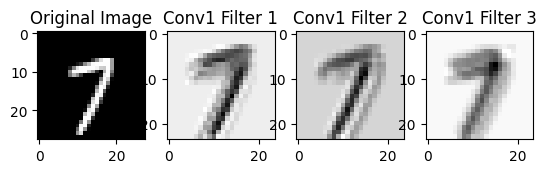

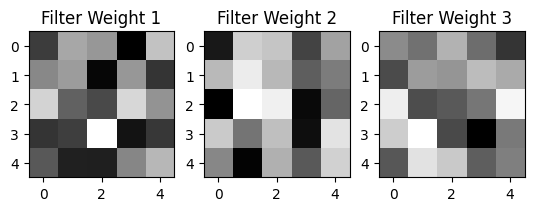

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F


# Set random seed for reproducibility
torch.manual_seed(42)

# Define the transformation for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True)

# Get a batch of test images and labels
dataiter = iter(testloader)
images, labels = next(iter(testloader))

# Define the LeNet model
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)  # First convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)  # Second convolutional layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=2)  # Third convolutional layer
        self.fc1 = nn.Linear(128 * 3 * 3, 625)  # Fully connected layer
        self.fc2 = nn.Linear(625, 10)  # Output layer

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # First convolutional layer with max pooling
        x = F.relu(F.max_pool2d(self.conv2(x), 2))  # Second convolutional layer with max pooling
        x = F.relu(self.conv3(x))  # Third convolutional layer
        x = x.view(-1, 128 * 3 * 3)  # Flatten the input for fully connected layer
        x = F.relu(self.fc1(x))  # Rectified layer
        x = self.fc2(x)  # Pre-softmax output layer
        return x

# Creating an instance of LeNet
model = LeNet()

# Training the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 10
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 1000 == 999:  # Print every 1000 mini-batches
            print(f'Epoch: {epoch+1}, Batch: {i+1}, Loss: {running_loss/1000:.3f}')
            running_loss = 0.0

print('Training finished!')

# Plotting the results
fig, axs = plt.subplots(1, 4)
axs[0].imshow(images[0].squeeze(), cmap='gray')
axs[0].set_title('Original Image')

# Get the output of the first convolutional layer
conv1_output = model.conv1(images[0].unsqueeze(0))

# Get the filter weights of the first convolutional layer
filter_weights = model.conv1.weight

# Plotting the convolution with 3 filters of the first convolutional layer
for i in range(3):
    axs[i+1].imshow(conv1_output[0][i].detach(), cmap='gray')
    axs[i+1].set_title(f'Conv1 Filter {i+1}')

# Plotting the filter weights
fig, axs = plt.subplots(1, 3)
for i in range(3):
    axs[i].imshow(filter_weights[i][0].detach(), cmap='gray')
    axs[i].set_title(f'Filter Weight {i+1}')

plt.show()



In [2]:
# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate test error
test_error = 1 - correct / total

Finally, choose one of the following tasks:
- add or remove one convolutional layer (you may adjust the number of filters)
- increase the filter size (you may plot some pictures i
- apply a random linear shift to the trainings images. Does this reduce overfitting?
- use unisotropic filters kx! = ky
- create a network architecture of your choice and see if you can improve on the previous results
and compare the new test error.
Ideally you should create an overview table that lists the test errors from all sections.

<b>Increase the filter size (you may plot some pictures )<b>

In [5]:


# Set random seed for reproducibility
torch.manual_seed(42)

# Define the transformation for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True)

# Get a batch of test images and labels
dataiter = iter(testloader)
images, labels = next(iter(testloader))
class LeNet_large_filters(nn.Module):
    def __init__(self):
        super(LeNet_large_filters, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=7)  # First convolutional layer with larger filter
        self.conv2 = nn.Conv2d(32, 64, kernel_size=7)  # Second convolutional layer with larger filter
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)  # Third convolutional layer with larger filter
        self.fc1 = nn.Linear(128 * 1 * 1, 625)  # Fully connected layer
        self.fc2 = nn.Linear(625, 10)  # Output layer

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # First convolutional layer with max pooling
        #print(x.shape)
        x = F.relu(self.conv2(x))  # Second convolutional layer without pooling
        #print(x.shape)
        x = F.relu(F.max_pool2d(self.conv3(x), 2))  # Third convolutional layer with pooling
        #print(x.shape)
        x = x.view(-1, 128 * 1 * 1)  # Flatten the input for fully connected layer
        #print(x.shape)
        x = F.relu(self.fc1(x))  # Rectified layer
        x = self.fc2(x)  # Pre-softmax output layer
        return x

 # Creating an instance of LeNet with larger filters
model_large_filters = LeNet_large_filters()   


In [6]:
# Training the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_large_filters.parameters(), lr=0.001)

n_epochs = 10
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_large_filters(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 1000 == 999:  # Print every 1000 mini-batches
            print(f'Epoch: {epoch+1}, Batch: {i+1}, Loss: {running_loss/1000:.3f}')
            running_loss = 0.0

print('Training finished!')


Epoch: 1, Batch: 1000, Loss: 0.582
Epoch: 1, Batch: 2000, Loss: 0.239
Epoch: 1, Batch: 3000, Loss: 0.182
Epoch: 1, Batch: 4000, Loss: 0.165
Epoch: 1, Batch: 5000, Loss: 0.142
Epoch: 1, Batch: 6000, Loss: 0.137
Epoch: 1, Batch: 7000, Loss: 0.128
Epoch: 1, Batch: 8000, Loss: 0.128
Epoch: 1, Batch: 9000, Loss: 0.119
Epoch: 1, Batch: 10000, Loss: 0.111
Epoch: 1, Batch: 11000, Loss: 0.114
Epoch: 1, Batch: 12000, Loss: 0.112
Epoch: 1, Batch: 13000, Loss: 0.121
Epoch: 1, Batch: 14000, Loss: 0.111
Epoch: 1, Batch: 15000, Loss: 0.113
Epoch: 2, Batch: 1000, Loss: 0.088
Epoch: 2, Batch: 2000, Loss: 0.104
Epoch: 2, Batch: 3000, Loss: 0.095
Epoch: 2, Batch: 4000, Loss: 0.095
Epoch: 2, Batch: 5000, Loss: 0.087
Epoch: 2, Batch: 6000, Loss: 0.095
Epoch: 2, Batch: 7000, Loss: 0.111
Epoch: 2, Batch: 8000, Loss: 0.096
Epoch: 2, Batch: 9000, Loss: 0.085
Epoch: 2, Batch: 10000, Loss: 0.077
Epoch: 2, Batch: 11000, Loss: 0.131
Epoch: 2, Batch: 12000, Loss: 0.098
Epoch: 2, Batch: 13000, Loss: 0.094
Epoch: 2, 

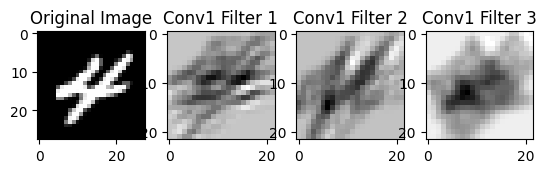

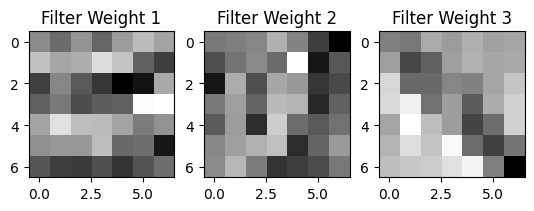

In [15]:
# Plotting the results
fig, axs = plt.subplots(1, 4)
axs[0].imshow(images[0].squeeze(), cmap='gray')
axs[0].set_title('Original Image')

# Get the output of the first convolutional layer
conv1_output = model_large_filters.conv1(images[0].unsqueeze(0))

# Get the filter weights of the first convolutional layer
filter_weights = model_large_filters.conv1.weight

# Plotting the convolution with 3 filters of the first convolutional layer
for i in range(3):
    axs[i+1].imshow(conv1_output[0][i].detach(), cmap='gray')
    axs[i+1].set_title(f'Conv1 Filter {i+1}')

# Plotting the filter weights
fig, axs = plt.subplots(1, 3)
for i in range(3):
    axs[i].imshow(filter_weights[i][0].detach(), cmap='gray')
    axs[i].set_title(f'Filter Weight {i+1}')

plt.show()


In [7]:
# Test the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_large_filters(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate test error
test_error_large_filters = 1 - correct / total

In [8]:
import pandas as pd

data = {
    'Model': ['LeNet', 'LeNet_large_filters'],
    'Test Error': [test_error, test_error_large_filters]
}

df = pd.DataFrame(data)
print(df)

                 Model  Test Error
0                LeNet      0.0153
1  LeNet_large_filters      0.0166
